In [1]:
# Valid JSON: note that you need the name of the "employees" JSON array object and that only double quotes are allowed!
# See http://www.w3schools.com/json/
# See http://stackoverflow.com/questions/4162642/python-single-vs-double-quotes-in-json
print open('employees.json').read()

{"employees":[
    {"firstName":"John", "lastName":"Doe"},
    {"firstName":"Anna", "lastName":"Smith"},
    {"firstName":"Peter", "lastName":"Jones"}
]}



In [2]:
import json
from pprint import pprint
data = json.load(open('employees.json'))
pprint(data)

{u'employees': [{u'firstName': u'John', u'lastName': u'Doe'},
                {u'firstName': u'Anna', u'lastName': u'Smith'},
                {u'firstName': u'Peter', u'lastName': u'Jones'}]}


In [3]:
rows=data['employees']
print len(rows)
print rows[0]['lastName']

3
Doe


In [4]:
# Shorter version of the original cern.txt file
# This is not valid JSON, it is missing the name of the 'transfers' JSON array object and uses single quotes
print open('cern_short.txt').read()

[{'timestamp_tr_comp': '2015-04-06T00:01:40', 'dst_hostname': 'golias100.farm.particle.cz', 'timestamp_tr_st': '2015-04-06T00:01:37', 'transfer_time': 3, 'f_size': 235564162, 'src_hostname': 'eosatlassftp.cern.ch', 'endpnt': 'fts3.cern.ch', 't_channel': 'gsiftp://eosatlassftp.cern.ch__srm://golias100.farm.particle.cz'}, {'timestamp_tr_comp': '2015-04-06T00:01:41', 'dst_hostname': 'grid-srm.rzg.mpg.de', 'timestamp_tr_st': '2015-04-06T00:01:39', 'transfer_time': 2, 'f_size': 1048576, 'src_hostname': 'srmatlas.pic.es', 'endpnt': 'fts3.cern.ch', 't_channel': 'srm://srmatlas.pic.es__srm://grid-srm.rzg.mpg.de'}, {'timestamp_tr_comp': '2015-04-06T00:01:50', 'dst_hostname': 'storm-fe.cr.cnaf.infn.it', 'timestamp_tr_st': '2015-04-06T00:01:49', 'transfer_time': 1, 'f_size': 1045278, 'src_hostname': 't2cmcondor.mi.infn.it', 'endpnt': 'fts3.cern.ch', 't_channel': 'srm://t2cmcondor.mi.infn.it__srm://storm-fe.cr.cnaf.infn.it'}]



In [5]:
# This is the script used to produce the shorter version of the cern.txt file and to prepare JSON compliant files
print open('jsonize_short.sh').read()

#!/bin/sh
echo "You must comment out this line!"; exit 1

cd `dirname $0`

# Extract a smaller portion of the file
head -c926 /home/avalassi/WA/hassen/RAW/cern.txt > cern_short.txt
\cp cern_short.txt cern_short2.txt
echo "]" >> cern_short.txt
echo "," >> cern_short2.txt
echo "]" >> cern_short2.txt

for file in cern_short cern_short2; do
  # Split the file into separate lines (otherwise sed chokes!)
  \rm -f ${file}_fmt.txt
  time fmt -s -w1 $file.txt > ${file}_fmt.txt
  # Then convert to JSON format
  \rm -f $file.json
  echo '{"transfers":' > $file.json
  time cat ${file}_fmt.txt | sed -e "s/}\]\[{/},\n{/g" -e "s/\]\[//g" -e "s/\[{/\[\n{/" -e "s/}\]/}\n\]/" -e 's/'\''/"/g' -e 's/None,/null,/' >> $file.json
  echo "}" >> $file.json
done



In [6]:
# Shorter version of the original cern.txt file, converted to JSON format
print open('cern_short.json').read()

{"transfers":
[
{"timestamp_tr_comp":
"2015-04-06T00:01:40",
"dst_hostname":
"golias100.farm.particle.cz",
"timestamp_tr_st":
"2015-04-06T00:01:37",
"transfer_time":
3,
"f_size":
235564162,
"src_hostname":
"eosatlassftp.cern.ch",
"endpnt":
"fts3.cern.ch",
"t_channel":
"gsiftp://eosatlassftp.cern.ch__srm://golias100.farm.particle.cz"},
{"timestamp_tr_comp":
"2015-04-06T00:01:41",
"dst_hostname":
"grid-srm.rzg.mpg.de",
"timestamp_tr_st":
"2015-04-06T00:01:39",
"transfer_time":
2,
"f_size":
1048576,
"src_hostname":
"srmatlas.pic.es",
"endpnt":
"fts3.cern.ch",
"t_channel":
"srm://srmatlas.pic.es__srm://grid-srm.rzg.mpg.de"},
{"timestamp_tr_comp":
"2015-04-06T00:01:50",
"dst_hostname":
"storm-fe.cr.cnaf.infn.it",
"timestamp_tr_st":
"2015-04-06T00:01:49",
"transfer_time":
1,
"f_size":
1045278,
"src_hostname":
"t2cmcondor.mi.infn.it",
"endpnt":
"fts3.cern.ch",
"t_channel":
"srm://t2cmcondor.mi.infn.it__srm://storm-fe.cr.cnaf.infn.it"}
]
}



In [7]:
# Load the file from JSON
import json
from pprint import pprint
data = json.load(open('cern_short.json'))
pprint(data)

{u'transfers': [{u'dst_hostname': u'golias100.farm.particle.cz',
                 u'endpnt': u'fts3.cern.ch',
                 u'f_size': 235564162,
                 u'src_hostname': u'eosatlassftp.cern.ch',
                 u't_channel': u'gsiftp://eosatlassftp.cern.ch__srm://golias100.farm.particle.cz',
                 u'timestamp_tr_comp': u'2015-04-06T00:01:40',
                 u'timestamp_tr_st': u'2015-04-06T00:01:37',
                 u'transfer_time': 3},
                {u'dst_hostname': u'grid-srm.rzg.mpg.de',
                 u'endpnt': u'fts3.cern.ch',
                 u'f_size': 1048576,
                 u'src_hostname': u'srmatlas.pic.es',
                 u't_channel': u'srm://srmatlas.pic.es__srm://grid-srm.rzg.mpg.de',
                 u'timestamp_tr_comp': u'2015-04-06T00:01:41',
                 u'timestamp_tr_st': u'2015-04-06T00:01:39',
                 u'transfer_time': 2},
                {u'dst_hostname': u'storm-fe.cr.cnaf.infn.it',
                 u'endpnt'

In [8]:
# Shorter version of the original cern.txt file, converted to JSON format, with a trailing comma...
print open('cern_short2.json').read()

{"transfers":
[
{"timestamp_tr_comp":
"2015-04-06T00:01:40",
"dst_hostname":
"golias100.farm.particle.cz",
"timestamp_tr_st":
"2015-04-06T00:01:37",
"transfer_time":
3,
"f_size":
235564162,
"src_hostname":
"eosatlassftp.cern.ch",
"endpnt":
"fts3.cern.ch",
"t_channel":
"gsiftp://eosatlassftp.cern.ch__srm://golias100.farm.particle.cz"},
{"timestamp_tr_comp":
"2015-04-06T00:01:41",
"dst_hostname":
"grid-srm.rzg.mpg.de",
"timestamp_tr_st":
"2015-04-06T00:01:39",
"transfer_time":
2,
"f_size":
1048576,
"src_hostname":
"srmatlas.pic.es",
"endpnt":
"fts3.cern.ch",
"t_channel":
"srm://srmatlas.pic.es__srm://grid-srm.rzg.mpg.de"},
{"timestamp_tr_comp":
"2015-04-06T00:01:50",
"dst_hostname":
"storm-fe.cr.cnaf.infn.it",
"timestamp_tr_st":
"2015-04-06T00:01:49",
"transfer_time":
1,
"f_size":
1045278,
"src_hostname":
"t2cmcondor.mi.infn.it",
"endpnt":
"fts3.cern.ch",
"t_channel":
"srm://t2cmcondor.mi.infn.it__srm://storm-fe.cr.cnaf.infn.it"},
]
}



In [9]:
# Load the file from JSON, with the trailing comma: this fails!
pprint(json.load(open('cern_short2.json')))

ValueError: No JSON object could be decoded

In [10]:
# Load the file from JSON, with the trailing comma: this fails!
# Note the more explicative error messages from simplejson allowing easier debugging!
import simplejson
pprint(simplejson.load(open('cern_short2.json')))

JSONDecodeError: Expecting object: line 51 column 1 (char 943)

In [11]:
rows=data['transfers']
print len(rows)
print rows[0]['f_size']

3
235564162


In [12]:
# Check that pandas exists
import pandas

In [13]:
# Load into a pandas DataFrame (an "ntuple")
from pandas import DataFrame
df = DataFrame(rows)
print df

                 dst_hostname        endpnt     f_size           src_hostname  \
0  golias100.farm.particle.cz  fts3.cern.ch  235564162   eosatlassftp.cern.ch   
1         grid-srm.rzg.mpg.de  fts3.cern.ch    1048576        srmatlas.pic.es   
2    storm-fe.cr.cnaf.infn.it  fts3.cern.ch    1045278  t2cmcondor.mi.infn.it   

                                           t_channel    timestamp_tr_comp  \
0  gsiftp://eosatlassftp.cern.ch__srm://golias100...  2015-04-06T00:01:40   
1   srm://srmatlas.pic.es__srm://grid-srm.rzg.mpg.de  2015-04-06T00:01:41   
2  srm://t2cmcondor.mi.infn.it__srm://storm-fe.cr...  2015-04-06T00:01:50   

       timestamp_tr_st  transfer_time  
0  2015-04-06T00:01:37              3  
1  2015-04-06T00:01:39              2  
2  2015-04-06T00:01:49              1  


In [14]:
# The imported columns have names that are difficult to digest in Latex for matplotlib plots (u'xxx'...)
print df.columns

Index([u'dst_hostname', u'endpnt', u'f_size', u'src_hostname', u't_channel', u'timestamp_tr_comp', u'timestamp_tr_st', u'transfer_time'], dtype='object')


In [15]:
# Change column names (and make them more user friendly too!)
# See http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
df.columns = ['dst', 'endpnt', 'fsize', 'src', 'chan', 'since', 'until', 'ttime']
print df.columns
print df

Index([u'dst', u'endpnt', u'fsize', u'src', u'chan', u'since', u'until', u'ttime'], dtype='object')
                          dst        endpnt      fsize                    src  \
0  golias100.farm.particle.cz  fts3.cern.ch  235564162   eosatlassftp.cern.ch   
1         grid-srm.rzg.mpg.de  fts3.cern.ch    1048576        srmatlas.pic.es   
2    storm-fe.cr.cnaf.infn.it  fts3.cern.ch    1045278  t2cmcondor.mi.infn.it   

                                                chan                since  \
0  gsiftp://eosatlassftp.cern.ch__srm://golias100...  2015-04-06T00:01:40   
1   srm://srmatlas.pic.es__srm://grid-srm.rzg.mpg.de  2015-04-06T00:01:41   
2  srm://t2cmcondor.mi.infn.it__srm://storm-fe.cr...  2015-04-06T00:01:50   

                 until  ttime  
0  2015-04-06T00:01:37      3  
1  2015-04-06T00:01:39      2  
2  2015-04-06T00:01:49      1  


In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.04527800e+06,   2.44971664e+07,   4.79490548e+07,
          7.14009432e+07,   9.48528316e+07,   1.18304720e+08,
          1.41756608e+08,   1.65208497e+08,   1.88660385e+08,
          2.12112274e+08,   2.35564162e+08]),
 <a list of 10 Patch objects>)

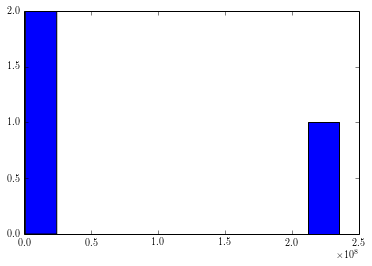

In [17]:
# 1D histo (filesize)
plt.hist(df.fsize)

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

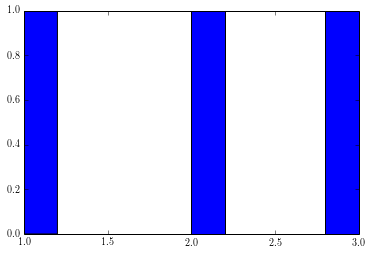

In [18]:
# 1D histo (transfer time)
plt.hist(df.ttime)

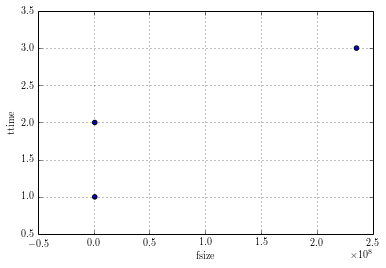

In [19]:
# 2D scatter plot (file size vs transfer time)
df.plot(kind='scatter', x='fsize', y='ttime');

In [20]:
# Check that numexpr is installed (needed for DataFrame.query)
import numexpr

In [21]:
# Select only some rows based on column values ("ntuple cuts")
# See http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
# See http://pandas.pydata.org/pandas-docs/stable/indexing.html
print df.query('fsize>2000000')

                          dst        endpnt      fsize                   src  \
0  golias100.farm.particle.cz  fts3.cern.ch  235564162  eosatlassftp.cern.ch   

                                                chan                since  \
0  gsiftp://eosatlassftp.cern.ch__srm://golias100...  2015-04-06T00:01:40   

                 until  ttime  
0  2015-04-06T00:01:37      3  


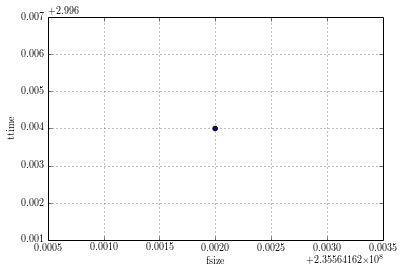

In [22]:
# 2D scatter plot (file size vs transfer time) with cuts
df.query('fsize>2000000').plot(kind='scatter', x='fsize', y='ttime');